In [1]:


import numpy as np
import matplotlib.pyplot as plt
from elephant.spike_train_generation import inhomogeneous_poisson_process
from elephant.gpfa.gpfa import GPFA
import quantities as pq
import neo


In [2]:

#@title Import matplotlib and set defaults
from matplotlib import rcParams 
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] =15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True


In [3]:
#@title Data loading
import numpy as np


fname = []
for j in range(3):
  fname.append('steinmetz_part%d.npz'%j)

alldat = np.array([])
for j in range(len(fname)):
  alldat = np.hstack((alldat, np.load('steinmetz_part%d.npz'%j, allow_pickle=True)['dat']))

In [4]:
def get_trials_mv_rtl(dat):
    ind=(dat['response'][:]==-1)
    left_act=dat['spks'][:,ind]
    return left_act


def get_trials_mv_ltr(dat):
    ind=(dat['response'][:]==1)
    left_act=dat['spks'][:,ind]
    return left_act
     
def get_trials_nogo(dat):
    ind=(dat['response'][:]==0)
    left_act=dat['spks'][:,ind]
    return left_act   


def get_spike_times(spikes):
    
    spike_times_trials=list()
    for i in range(spikes.shape[1]):
        trial=spikes[:,i]
        #neuron_time=list()
        neurons_in_trial=list()
        for neuron in trial:
            indices=(neuron[:]!=0)
            spike_train_=np.multiply(indices,np.arange(250))
            #spike_train_neuron=np.hstack([[0],spike_train_[indices]])
            spike_train_neuron=spike_train_[indices]
            neurons_in_trial.append(neo.SpikeTrain(spike_train_neuron*10*pq.ms,t_stop=2500.0))

        spike_times_trials.append(neurons_in_trial)
    return spike_times_trials

            
            
            
            
        
        

In [5]:
dat=alldat[4]
spikes=dat['spks']
trials=spikes.shape[1]
spike_trains=get_spike_times(spikes)

left_trials=get_trials_mv_rtl(dat)
right_trials=get_trials_mv_ltr(dat)
nogo_trials=left_trials=get_trials_nogo(dat)

In [6]:
left_spike_times=get_spike_times(left_trials)
right_spike_times=get_spike_times(right_trials)
nogo_spike_times=get_spike_times(nogo_trials)

In [8]:
from elephant.gpfa.gpfa import GPFA


# specify fitting parameters
bin_size = 10.0*pq.ms
latent_dimensionality = 3
gpfa_3dim = GPFA(bin_size=bin_size, x_dim=latent_dimensionality)

gpfa_3dim.fit(spike_trains[:trials//3])

Initializing parameters using factor analysis...

Fitting GPFA model...


GPFA(bin_size=array(10.) * ms)

In [9]:
trajectories_left = gpfa_3dim.transform(left_spike_times)
trajectories_right = gpfa_3dim.transform(right_spike_times)
trajectories_nogo=gpfa_3dim.transform(nogo_spike_times)

/tmp/ipykernel_3980/3244500992.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)
/home/himanshu/Coding/NMA/steinmetz-analysis/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:134: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


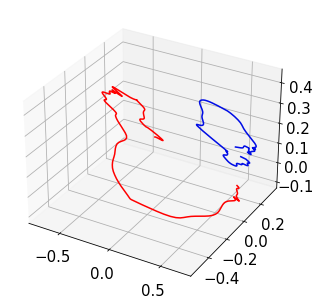

In [25]:


fig = plt.figure()
ax = Axes3D(fig)


average_trajectory_left= np.mean(trajectories_left, axis=0)
average_trajectory_right= np.mean(trajectories_right, axis=0)
average_trajectory_nogo= np.mean(trajectories_nogo, axis=0)



ax.plot(average_trajectory_left[0], average_trajectory_left[1],average_trajectory_left[2], c='blue')
ax.plot(average_trajectory_right[0], average_trajectory_right[1],average_trajectory_right[2], c='red')
#ax.plot(average_trajectory_nogo[0], average_trajectory_nogo[1],average_trajectory_nogo[2], c='green', alpha=0.1)
#ax.scatter(single_trial_trajectory[0], single_trial_trajectory[1],single_trial_trajectory[2], c='limegreen')
plt.show()

/tmp/ipykernel_3980/2846672603.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


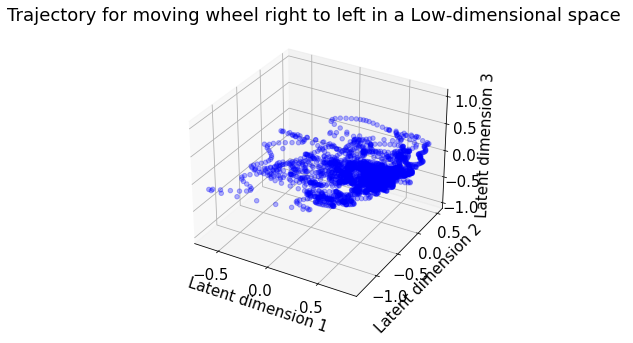

In [14]:
fig = plt.figure()
ax = Axes3D(fig)
ax.set_title(f'Trajectory for moving wheel right to left in a Low-dimensional space ')
ax.set_xlabel('Latent dimension 1')
ax.set_ylabel('Latent dimension 2')
ax.set_zlabel('Latent dimension 3')

for single_trial_trajectory in trajectories_left[:10]:
    sixe=len(single_trial_trajectory[0])
    ax.scatter(single_trial_trajectory[0], single_trial_trajectory[1],single_trial_trajectory[2], c='blue',alpha=0.3)

    


In [36]:
print(type(trajectories_left),trajectories_left)

fname="Session_Trajectory4.txt"
fhand=open(fname,'w')
for line in trajectories_left:
        np.savetxt(fhand,line)
        
fhand.write("\n")
for line in trajectories_right:
        np.savetxt(fhand,line)
        
fhand.close()


<class 'numpy.ndarray'> [array([[ 1.25257755e-01,  1.31661660e-01,  1.26547447e-01,
          1.21045421e-01,  1.13748019e-01,  1.03499233e-01,
          9.27832091e-02,  8.26280596e-02,  6.55771377e-02,
          5.67408365e-02,  4.51102578e-02,  4.11489977e-02,
          3.77835575e-02,  3.26447144e-02,  2.99207561e-02,
          3.14739558e-02,  3.53379410e-02,  3.71066107e-02,
          4.52494353e-02,  4.76003059e-02,  5.97231522e-02,
          7.10217279e-02,  8.45022623e-02,  9.45762686e-02,
          1.06014261e-01,  1.16897003e-01,  1.21836806e-01,
          1.24275148e-01,  1.29297873e-01,  1.32513206e-01,
          1.37122444e-01,  1.41731581e-01,  1.41146863e-01,
          1.36984152e-01,  1.32365383e-01,  1.21355734e-01,
          1.10742473e-01,  9.99218475e-02,  9.48290710e-02,
          8.36420653e-02,  7.93585733e-02,  7.06460945e-02,
          6.78099022e-02,  6.46834447e-02,  6.75360021e-02,
          7.60962522e-02,  9.25310538e-02,  1.11534884e-01,
          1.3541

/tmp/ipykernel_3980/4002796176.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


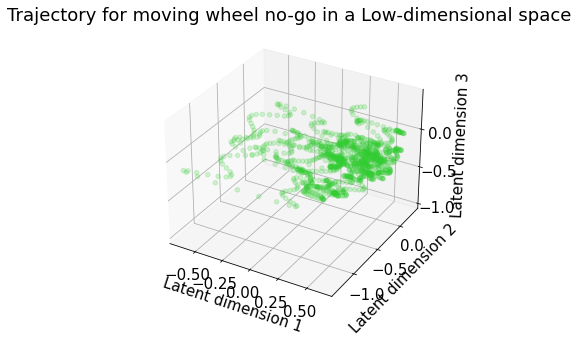

In [22]:
fig = plt.figure()
ax = Axes3D(fig)

ax.set_title(f'Trajectory for moving wheel no-go in a Low-dimensional space ')
ax.set_xlabel('Latent dimension 1')
ax.set_ylabel('Latent dimension 2')
ax.set_zlabel('Latent dimension 3')

for single_trial_trajectory in trajectories_nogo[:5]:
    ax.scatter(single_trial_trajectory[0], single_trial_trajectory[1],single_trial_trajectory[2], c='limegreen',alpha=0.2)
    



/tmp/ipykernel_3980/385190571.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


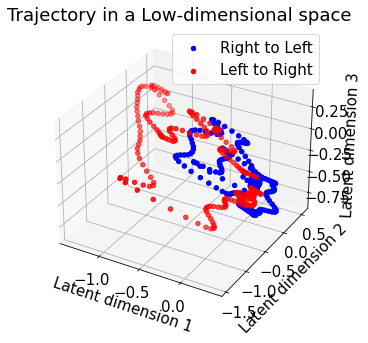

In [30]:
fig = plt.figure()
ax = Axes3D(fig)
ax.set_title(f'Trajectory in a Low-dimensional space ')
ax.set_xlabel('Latent dimension 1')
ax.set_ylabel('Latent dimension 2')
ax.set_zlabel('Latent dimension 3')
n1=1
n2=2
for single_trial_trajectory in trajectories_left[n1:n2]:
    sixe=len(single_trial_trajectory[0])
    ax.scatter(single_trial_trajectory[0], single_trial_trajectory[1],single_trial_trajectory[2], c='blue',alpha=1, label= 'Right to Left')

    
#ax.plot(average_trajectory_left[0], average_trajectory_left[1],average_trajectory_left[2], c='yellow')

for single_trial_trajectory in trajectories_right[0:1]:
    ax.scatter(single_trial_trajectory[0], single_trial_trajectory[1],single_trial_trajectory[2], c='red',label='Left to Right')
    
"""for single_trial_trajectory in trajectories_nogo[0:1]:
    ax.scatter(single_trial_trajectory[0], single_trial_trajectory[1],single_trial_trajectory[2], c='limegreen',alpha=0.5)
    """
plt.legend()
#ax.view_init(elev=11,azim=300)

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
ax.set_title(f'Trajectory for moving wheel right to left in a Low-dimensional space ')
ax.set_xlabel('Latent dimension 1')
ax.set_ylabel('Latent dimension 2')
ax.set_zlabel('Latent dimension 3')

for single_trial_trajectory in trajectories_left[:10]:
    sixe=len(single_trial_trajectory[0])
    ax.scatter(single_trial_trajectory[0], single_trial_trajectory[1],single_trial_trajectory[2], c='blue',alpha=0.3)

    
for single_trial_trajectory in trajectories_right[:10]:
    sixe=len(single_trial_trajectory[0])
    ax.scatter(single_trial_trajectory[0], single_trial_trajectory[1],single_trial_trajectory[2], c='red',alpha=0.3)

for single_trial_trajectory in trajectories_nogo[:10]:
    sixe=len(single_trial_trajectory[0])
    ax.scatter(single_trial_trajectory[0], single_trial_trajectory[1],single_trial_trajectory[2], c='limegreen',alpha=0.3)



In [ ]:
for dat in alldat:
    left_trials=get_trials_mv_rtl(dat)
    right_trials=get_trials_mv_ltr(dat)
    nogo_trials=get_trials_nogo(dat)

    spikes=dat['spks']
    trials=spikes.shape[1]
    spike_trains=get_spike_times(spikes)
    
    left_spike_times=get_spike_times(left_trials)
    right_spike_times=get_spike_times(right_trials)
    nogo_spike_times=get_spike_times(nogo_trials)
    
    #fitting the data via gpfa
    bin_size = 10.0*pq.ms
    latent_dimensionality = 3
    gpfa_3dim = GPFA(bin_size=bin_size, x_dim=latent_dimensionality)

    gpfa_3dim.fit(spike_trains)
    
    ax1 = Axes3D(fig)

    ax1.set_title(f'Trajectory for moving wheel no-go in a Low-dimensional space ')
    ax1.set_xlabel('Latent dimension 1')
    ax1.set_ylabel('Latent dimension 2')
    ax1.set_zlabel('Latent dimension 3')

    for single_trial_trajectory in trajectories_nogo:
        ax1.scatter(single_trial_trajectory[0], single_trial_trajectory[1],single_trial_trajectory[2], c='limegreen',alpha=0.1)